In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
plt.rc('font', family='NanumBarunGothic')
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' # for windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [3]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes',labelsize = 16)
mpl.rc('xtick',labelsize = 12)
mpl.rc('ytick',labelsize = 12)

In [4]:
df = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\data\construct_Oil_data\train.csv',encoding = 'cp949')
test = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\data\construct_Oil_data\test.csv',encoding = 'cp949')

In [5]:
test = test.rename(columns={'ANONYMOUS_1' : '수치형데이터1','ANONYMOUS_2' : '수치형데이터2','COMPONENT_ARBITRARY':'샘플오일관련부품','AG':'은','CO':'일산화탄소','CR':'크로뮴','CU':'구리','FE':'철','H2O':'물','MN':'망가니즈','MO':'몰리브데넘','NI':'니켈','TI':'타이타늄','V':'바나듐','ZN':'아연','PQINDEX':'입자 정량 지수','V40':'점도 40도','YEAR':'진단년도'})
df = df.rename(columns={'ANONYMOUS_1' : '수치형데이터1','ANONYMOUS_2' : '수치형데이터2','COMPONENT_ARBITRARY':'샘플오일관련부품','AG':'은','CO':'일산화탄소','CR':'크로뮴','CU':'구리','FE':'철','H2O':'물','MN':'망가니즈','MO':'몰리브데넘','NI':'니켈','TI':'타이타늄','V':'바나듐','ZN':'아연','PQINDEX':'입자 정량 지수','V40':'점도 40도','YEAR':'진단년도'})

## 결측치가 많은 컬럼 제거

In [6]:
drop_columns=['FH2O','FNOX','FOPTIMETHGLY','FOXID','FSO4','FTBN','FUEL','SOOTPERCENTAGE','U100','U75','U50','U25','U20','U14','U6','U4','V100']

In [7]:
train = df.drop(columns=drop_columns)

In [8]:
df

,ID,샘플오일관련부품,수치형데이터1,진단년도,SAMPLE_TRANSFER_DAY,수치형데이터2,은,AL,B,BA,...,U25,U20,U14,U6,U4,바나듐,V100,점도 40도,아연,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,8,200,0,2,201,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,135.4,16,0
14091,TRAIN_14091,COMPONENT1,2784,2013,2,200,0,3,85,0,...,NaN,NaN,NaN,NaN,NaN,0,14.5,117.5,1408,0
14092,TRAIN_14092,COMPONENT3,1788,2008,9,550,0,6,0,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,54.0,1301,0
14093,TRAIN_14093,COMPONENT2,2498,2009,19,550,0,2,4,0,...,7.0,8.0,100.0,1625.0,18890.0,0,NaN,44.3,652,0


In [9]:
test

,ID,샘플오일관련부품,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,TEST_6036,COMPONENT3,1714,2014,200,0,0,3,130,1047,0.0,65,5,2,1999,0,0,71.2,1163
6037,TEST_6037,COMPONENT3,4131,2016,200,0,0,5,2,736,0.0,5,0,0,693,0,0,137.8,13
6038,TEST_6038,COMPONENT3,4325,2014,200,0,0,0,0,53,0.0,0,0,0,69,0,0,302.2,13
6039,TEST_6039,COMPONENT2,1364,2013,200,0,0,0,62,2,0.0,0,0,0,5,0,0,51.1,478


In [10]:
test_columns_list = test.columns

In [11]:
df['Y_LABEL']

0        0
1        0
2        1
3        0
4        0
        ..
14090    0
14091    0
14092    0
14093    0
14094    0
Name: Y_LABEL, Length: 14095, dtype: int64

In [12]:
df[test_columns_list]

,ID,샘플오일관련부품,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연
0,TRAIN_00000,COMPONENT3,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75
1,TRAIN_00001,COMPONENT2,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652
2,TRAIN_00002,COMPONENT2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412
3,TRAIN_00003,COMPONENT3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7
4,TRAIN_00004,COMPONENT3,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,200,0,0,0,3,23,0.0,0,0,0,35,0,0,135.4,16
14091,TRAIN_14091,COMPONENT1,2784,2013,200,0,0,0,2,12,0.0,0,224,0,9,0,0,117.5,1408
14092,TRAIN_14092,COMPONENT3,1788,2008,550,0,0,4,7,415,0.0,7,10,1,645,0,0,54.0,1301
14093,TRAIN_14093,COMPONENT2,2498,2009,550,0,0,0,170,19,0.0,0,1,0,11,0,0,44.3,652


In [13]:
df_train = df[test_columns_list]

In [14]:
df_train['Y_LABEL'] = df['Y_LABEL']

C:\Users\yoon9\AppData\Local\Temp\ipykernel_29536\4263289332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Y_LABEL'] = df['Y_LABEL']


In [15]:
df_train

,ID,샘플오일관련부품,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,200,0,0,0,3,23,0.0,0,0,0,35,0,0,135.4,16,0
14091,TRAIN_14091,COMPONENT1,2784,2013,200,0,0,0,2,12,0.0,0,224,0,9,0,0,117.5,1408,0
14092,TRAIN_14092,COMPONENT3,1788,2008,550,0,0,4,7,415,0.0,7,10,1,645,0,0,54.0,1301,0
14093,TRAIN_14093,COMPONENT2,2498,2009,550,0,0,0,170,19,0.0,0,1,0,11,0,0,44.3,652,0


## 변수 별 상관관계 히트맵

C:\Users\yoon9\AppData\Local\Temp\ipykernel_29536\2472396314.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True, fmt='.2f', cmap = 'RdYlGn_r')
C:\Users\yoon9\anaconda3\envs\Sejong_project\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\yoon9\anaconda3\envs\Sejong_project\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


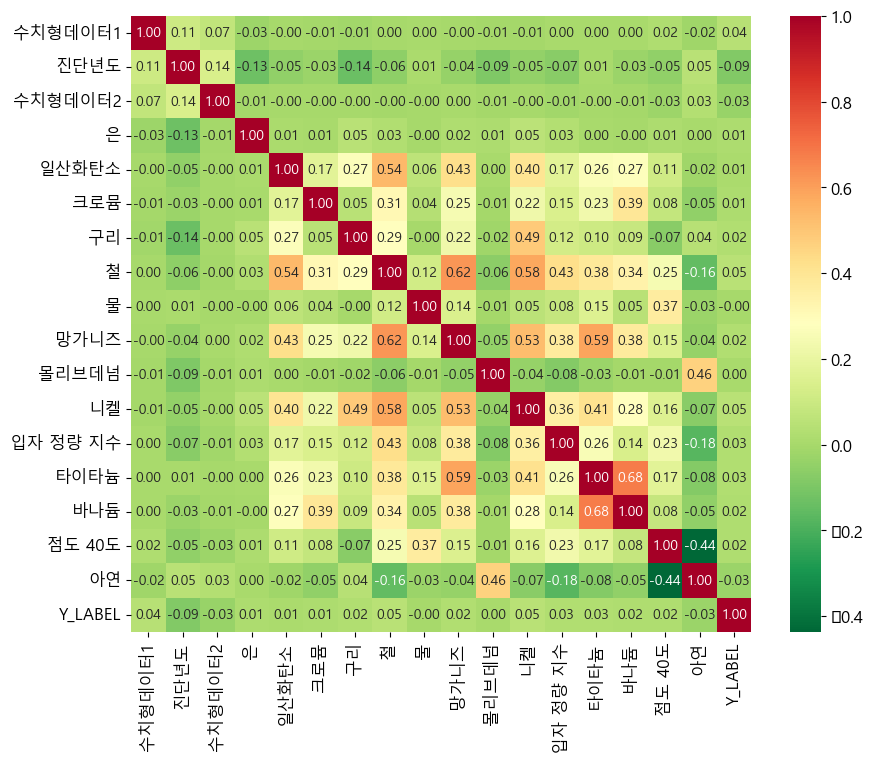

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(),annot=True, fmt='.2f', cmap = 'RdYlGn_r')
plt.show()

## 타이타늄과 바나듐 선형회귀 그래프

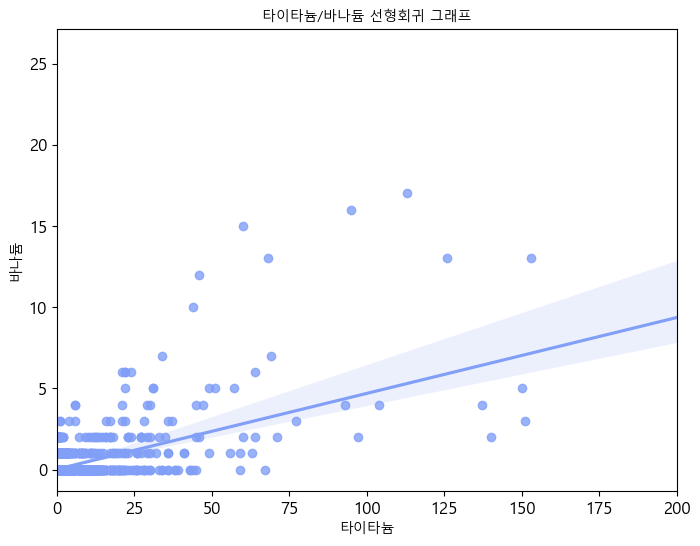

In [17]:
plt.figure(figsize=(8, 6))
plt.title('타이타늄/바나듐 선형회귀 그래프', fontsize=10)
sns.regplot(data=df_train,x='타이타늄',y='바나듐',color='#819FF7')
plt.xlim(0,200)
plt.xlabel('타이타늄', fontsize=10)
plt.ylabel('바나듐', fontsize=10)
plt.show()

## 점도와 아연의 산점도 그래프

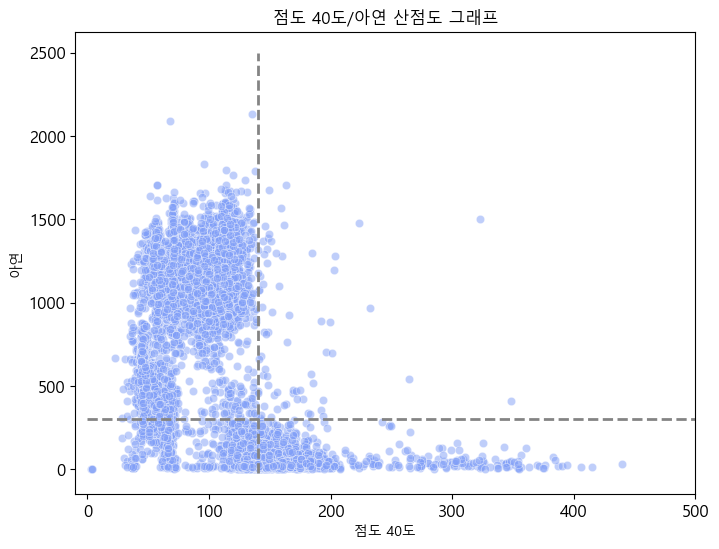

In [18]:
plt.figure(figsize=(8, 6))
plt.title('점도 40도/아연 산점도 그래프', fontsize=12)
sns.scatterplot(data=df_train,x='점도 40도',y='아연',color='#819FF7',alpha = 0.5)
plt.xlim(-10,500)
plt.vlines(140, -20, 2500, color='#848484', linestyle='--', linewidth=2)
plt.hlines(300, 0, 500, color='#848484', linestyle='--', linewidth=2)
plt.xlabel('점도 40도', fontsize=10)
plt.ylabel('아연', fontsize=10)
plt.show()

## LABEL에 따른 변수별 상관관계 시각화

In [19]:
df_label_corr = df_train.corr()['Y_LABEL'].drop('Y_LABEL')

C:\Users\yoon9\AppData\Local\Temp\ipykernel_29536\2095380087.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_label_corr = df_train.corr()['Y_LABEL'].drop('Y_LABEL')


In [20]:
df_label_corr = df_label_corr.reset_index()

In [21]:
df_label_corr

,index,Y_LABEL
0,수치형데이터1,0.044197
1,진단년도,-0.087871
2,수치형데이터2,-0.033641
3,은,0.014671
4,일산화탄소,0.008175
5,크로뮴,0.014233
6,구리,0.024975
7,철,0.047992
8,물,-0.004262
9,망가니즈,0.024274


In [22]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

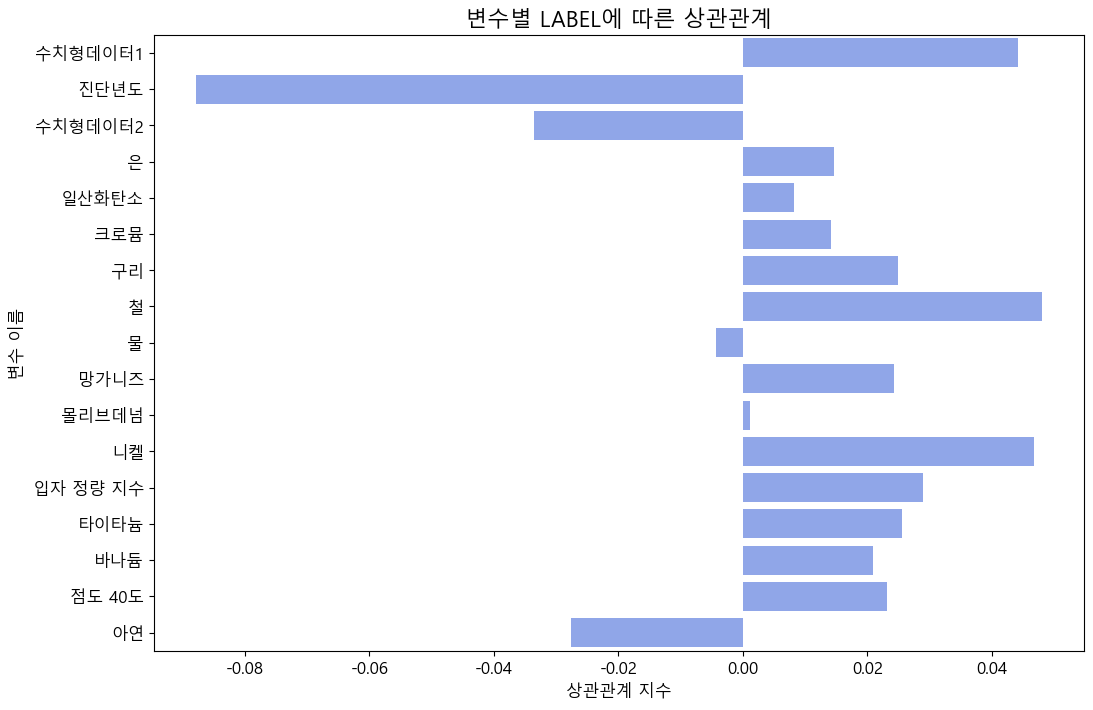

In [23]:
plt.figure(figsize=(12,8))
plt.title('변수별 LABEL에 따른 상관관계', fontsize=16)
sns.barplot(df_label_corr, y = 'index', x = 'Y_LABEL',color='#819FF7')
plt.xlabel('상관관계 지수', fontsize=12)
plt.ylabel('변수 이름', fontsize=12)
plt.show()

## 건설기계별 진단년도

In [24]:
df_train_year = df_train['진단년도'].value_counts()

In [25]:
df_train['진단년도'] = df_train['진단년도'].astype('int')

C:\Users\yoon9\AppData\Local\Temp\ipykernel_29536\3225793189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['진단년도'] = df_train['진단년도'].astype('int')


In [26]:
df_train_year_0 = df_train[df_train['Y_LABEL'] == 0]
df_train_year_1 = df_train[df_train['Y_LABEL'] == 1]

In [27]:
df_train['Y_LABEL'].value_counts()

0    12892
1     1203
Name: Y_LABEL, dtype: int64

In [28]:
df_train_year_0

,ID,샘플오일관련부품,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652,0
3,TRAIN_00003,COMPONENT3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128,0
5,TRAIN_00005,COMPONENT3,2061,2008,550,0,0,3,179,550,0.0,42,11,4,329,0,0,69.7,1015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,200,0,0,0,3,23,0.0,0,0,0,35,0,0,135.4,16,0
14091,TRAIN_14091,COMPONENT1,2784,2013,200,0,0,0,2,12,0.0,0,224,0,9,0,0,117.5,1408,0
14092,TRAIN_14092,COMPONENT3,1788,2008,550,0,0,4,7,415,0.0,7,10,1,645,0,0,54.0,1301,0
14093,TRAIN_14093,COMPONENT2,2498,2009,550,0,0,0,170,19,0.0,0,1,0,11,0,0,44.3,652,0


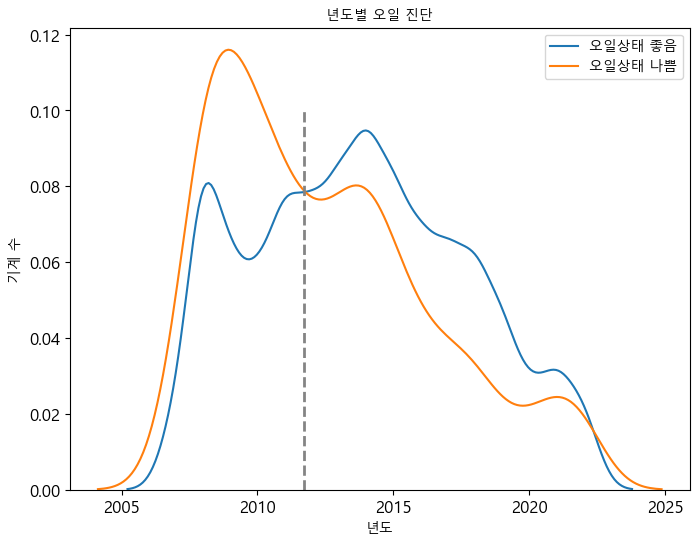

In [29]:
plt.figure(figsize=(8,6))
plt.title('년도별 오일 진단', fontsize=10)
sns.kdeplot(df_train_year_0['진단년도'],label='오일상태 좋음')
sns.kdeplot(df_train_year_1['진단년도'],label='오일상태 나쁨')
plt.vlines( 2011.7,0, 0.1, color='#848484', linestyle='--', linewidth=2)
plt.legend(loc='best')
plt.xlabel('년도', fontsize=10)
plt.ylabel('기계 수', fontsize=10)
plt.show()

## 진단년도에 따른 수치형 데이터의 변화

In [30]:
df_train_year_group = df_train.groupby(['진단년도']).mean().reset_index()

C:\Users\yoon9\AppData\Local\Temp\ipykernel_29536\3890554447.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_train_year_group = df_train.groupby(['진단년도']).mean().reset_index()


<AxesSubplot: xlabel='진단년도', ylabel='니켈'>

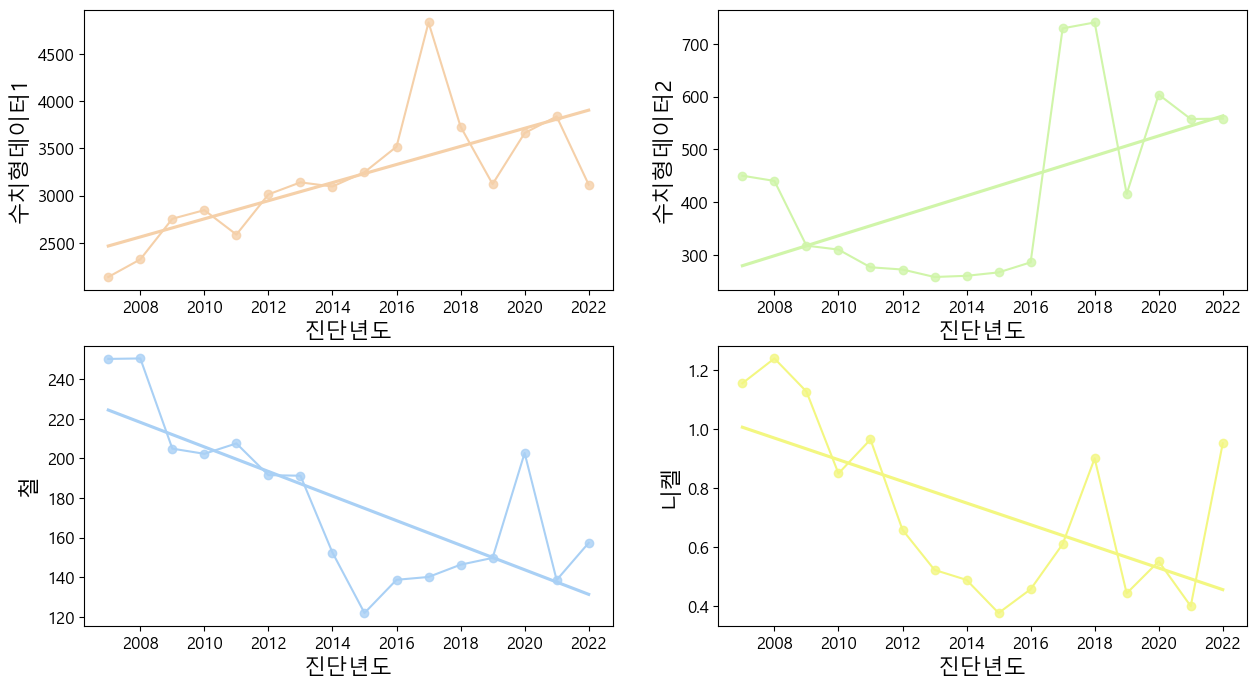

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,8))
sns.lineplot(data = df_train_year_group, x = '진단년도', y = '수치형데이터1',ax=ax[0][0],color='#F5D0A9')
sns.lineplot(data = df_train_year_group, x = '진단년도', y = '수치형데이터2',ax=ax[0][1],color='#D0F5A9')
sns.lineplot(data = df_train_year_group, x = '진단년도', y = '철',ax=ax[1][0], color='#A9D0F5')
sns.lineplot(data = df_train_year_group, x = '진단년도', y = '니켈',ax=ax[1][1],color='#F3F781')
sns.regplot(data = df_train_year_group, x = '진단년도', y = '수치형데이터1',ax=ax[0][0],ci = None,color='#F5D0A9')
sns.regplot(data = df_train_year_group, x = '진단년도', y = '수치형데이터2',ax=ax[0][1],ci = None,color='#D0F5A9')
sns.regplot(data = df_train_year_group, x = '진단년도', y = '철',ax=ax[1][0],ci = None,color='#A9D0F5')
sns.regplot(data = df_train_year_group, x = '진단년도', y = '니켈',ax=ax[1][1],ci = None,color='#F3F781')

<AxesSubplot: xlabel='진단년도', ylabel='니켈'>

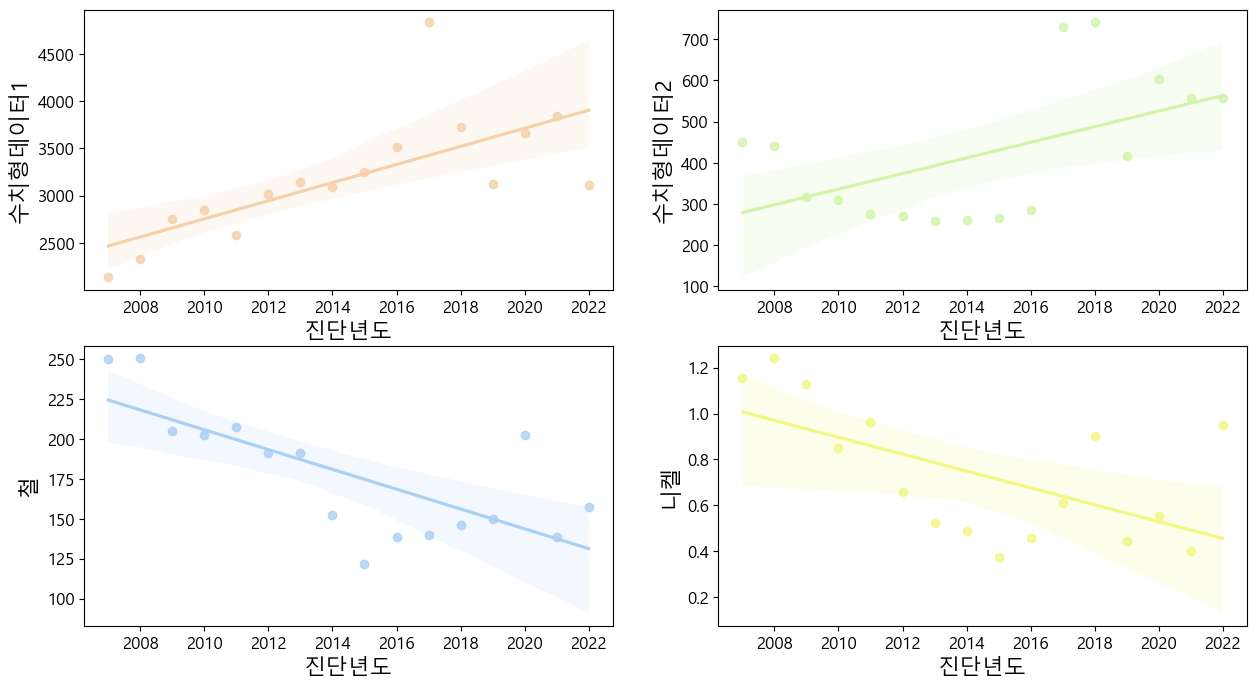

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,8))
sns.regplot(data = df_train_year_group, x = '진단년도', y = '수치형데이터1',ax=ax[0][0],color='#F5D0A9')
sns.regplot(data = df_train_year_group, x = '진단년도', y = '수치형데이터2',ax=ax[0][1],color='#D0F5A9')
sns.regplot(data = df_train_year_group, x = '진단년도', y = '철',ax=ax[1][0],color='#A9D0F5')
sns.regplot(data = df_train_year_group, x = '진단년도', y = '니켈',ax=ax[1][1],color='#F3F781')

## 진단년도별 오일 내의 철 수치 그래프

C:\Users\yoon9\AppData\Local\Temp\ipykernel_29536\1813800728.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = df_train['진단년도'],y = df_train['철'],hue = df_train['Y_LABEL'],ci=False)


(0.0, 500.0)

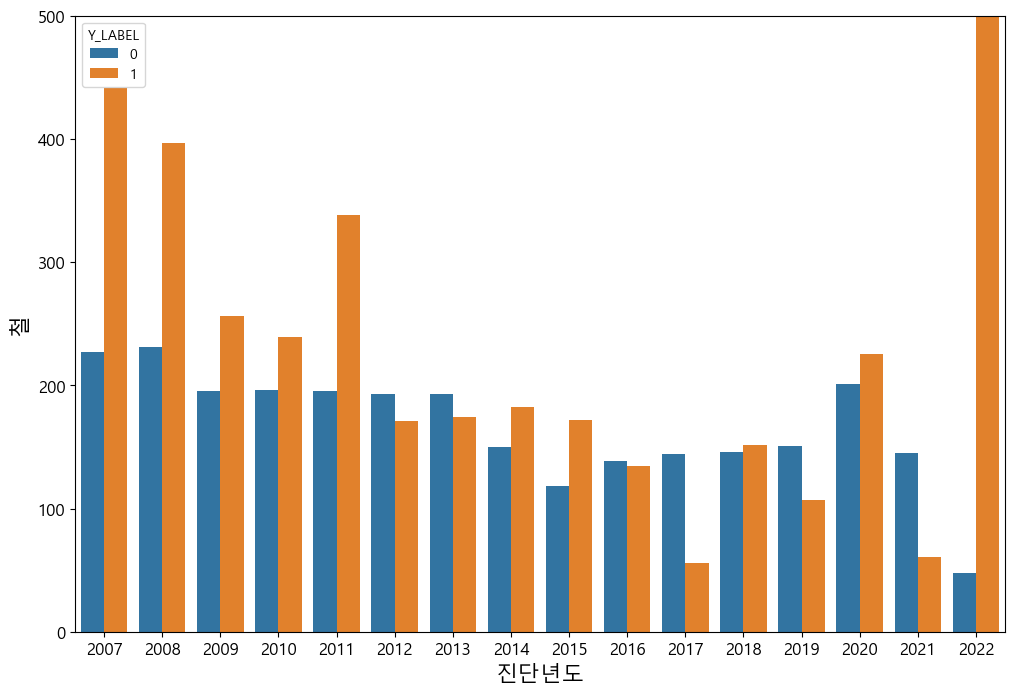

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(x = df_train['진단년도'],y = df_train['철'],hue = df_train['Y_LABEL'],ci=False)
plt.xlabel('진단년도')
plt.ylabel('철')
plt.ylim(0,500)

## train 이상치 탐지

In [36]:
df_train

,ID,샘플오일관련부품,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,200,0,0,0,3,23,0.0,0,0,0,35,0,0,135.4,16,0
14091,TRAIN_14091,COMPONENT1,2784,2013,200,0,0,0,2,12,0.0,0,224,0,9,0,0,117.5,1408,0
14092,TRAIN_14092,COMPONENT3,1788,2008,550,0,0,4,7,415,0.0,7,10,1,645,0,0,54.0,1301,0
14093,TRAIN_14093,COMPONENT2,2498,2009,550,0,0,0,170,19,0.0,0,1,0,11,0,0,44.3,652,0


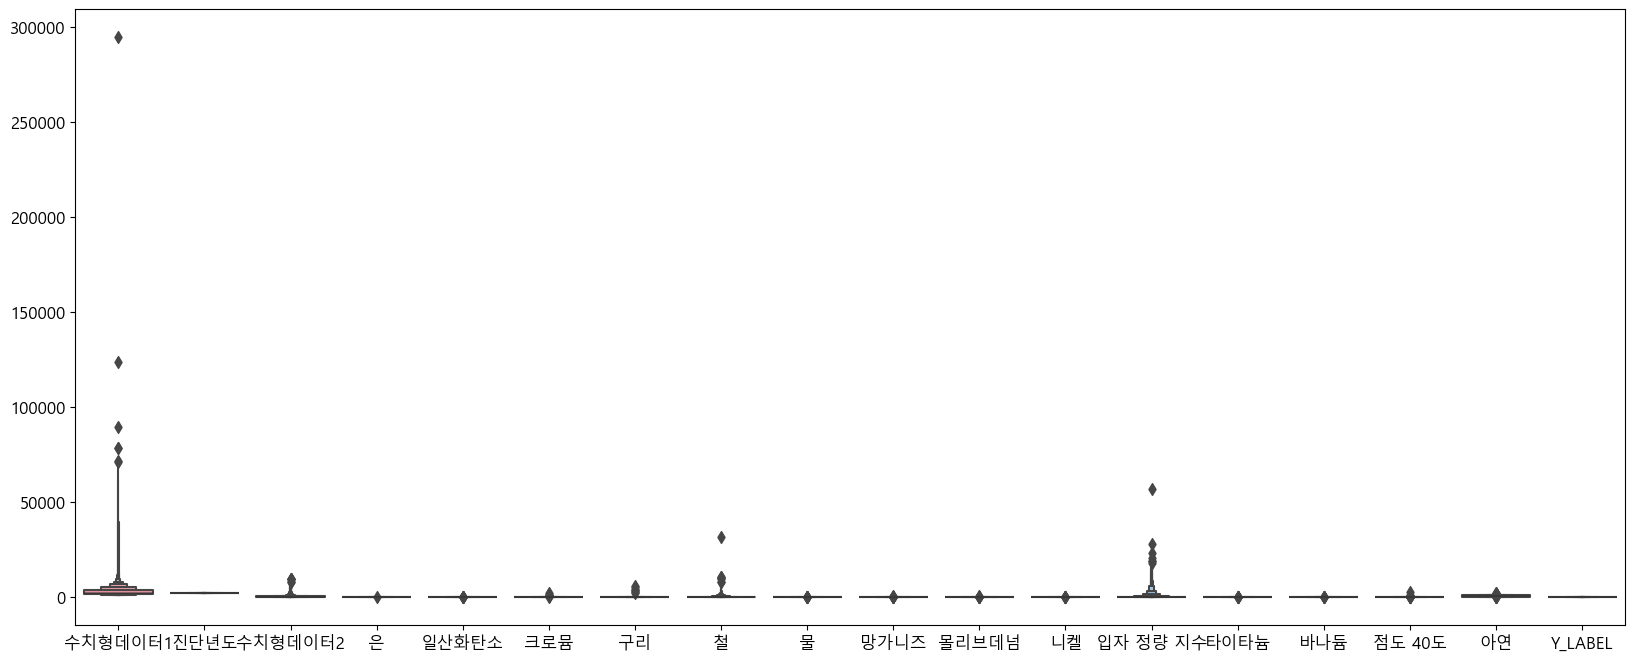

In [42]:
plt.figure(figsize=(20,8))
sns.boxenplot(df_train)
plt.show()